# Trabajo de programación Nº 1
## LFIS419 - Inteligencia Artificial
Entrega Miércoles 29 de Marzo a través del Aula Virtual

## Instrucciones Generales:

*   Siga las instrucciones del notebook
*   Cambie el Nombre del Archivo, indicando el Nº del trabajo y el número del grupo (para trabajos grupales) o su nombre (para trabajos individuales)
*   Use las celdas de texto, para explicar los objetivos del código y comentar los resultados obtenidos.
*   Use comentarios dentro del código para explicar cómo funciona, por qué usa tal o cual comando, que contienen las variables, etc.
*   Edite la celda siguiente, para completar el nombre, rut y correo del (de los) integrante(s).








## Identificación del (de los) Estudiante(s):
<table>
<tr>
<th> Nombre </th>
<th> RUT </th>
<th> email </th>
</tr>
<tr>
<td> Fabian Trigo </td>
<td> 20.183.107-5 </td>
<td> fabian.trigo@alumnos.uv.cl </td>
</tr>
<tr>
<td> Simon Vivanco </td>
<td> 20.360.705-9 </td>
<td> simon.vivanco@alumnos.uv.cl </td>
</tr>
<tr>
<td> Bastian Muñoz </td>
<td> 20.183.097-4 </td>
<td> bastian.munozp@alumnos.uv.cl </td>
</tr>
</table>

## Instrucciones específicas
En este trabajo exploraremos un dataset usado previamente con técnicas de machine learning y obtenido desde https://archive.ics.uci.edu/ml/datasets/Accelerometer (visitado el 22 de marzo de 2023). Revisar la descripción de estos datos en la página original.

En el aula virtual está disponible el archivo accelerometer_datosTrabajo1.csv, el que deben subir a Google Colab y completar las actividades descritas.

El objetivo es usar herramientas básicas que permitan procesar datos que serán típicamente usados en subsecuentes trabajos.

Referencia:

UCI Machine Learning Repository: Accelerometer Data Set. (2021). Uci.edu. https://archive.ics.uci.edu/ml/datasets/Accelerometer

‌

## Actividad 1:

Importe las librerías requeridas (pandas, matplotlib, numpy, etc.) y abra, utilizando pandas, el archivo adjunto al trabajo.

Determine la cantidad de filas y los nombres de las columnas en el dataframe resultante.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

dataframe = pd.read_csv("accelerometer_datosTrabajo1.csv")

print(f"cantidad columnas: {len(dataframe.columns)}, cantidad filas: {len(dataframe)}")

dataframe.describe()

cantidad columnas: 5, cantidad filas: 153000


,wconfid,pctid,x,y,z
count,153000.000000,153000.000000,153000.000000,153000.000000,153000.000000
mean,2.000000,60.000000,0.995622,0.005351,-0.117769
std,0.816499,24.494977,0.773958,0.742602,0.517008
min,1.000000,20.000000,-8.000000,-8.000000,-5.867000
25%,1.000000,40.000000,0.945000,-0.078000,-0.172000
50%,2.000000,60.000000,0.992000,0.008000,-0.125000
75%,3.000000,80.000000,1.039000,0.105000,-0.066000
max,3.000000,100.000000,7.996000,7.996000,6.086000


In [19]:
# el data set se puede separar en la configuracion de los pesos
set_weight_configuration = set(dataframe['wconfid']) # un set me indica los valores unicos

for wconfiguration in set_weight_configuration:
    print(dataframe[dataframe['wconfid'] == wconfiguration].describe())

       wconfid         pctid             x             y             z
count  51000.0  51000.000000  51000.000000  51000.000000  51000.000000
mean       1.0     60.000000      1.000087     -0.003925     -0.122148
std        0.0     24.495138      1.080425      1.080584      0.691010
min        1.0     20.000000     -8.000000     -8.000000     -5.867000
25%        1.0     40.000000      0.902000     -0.113000     -0.266000
50%        1.0     60.000000      0.992000      0.020000     -0.125000
75%        1.0     80.000000      1.074000      0.176000     -0.012000
max        1.0    100.000000      7.996000      7.996000      4.992000
       wconfid         pctid             x             y             z
count  51000.0  51000.000000  51000.000000  51000.000000  51000.000000
mean       2.0     60.000000      0.998190      0.014133     -0.111833
std        0.0     24.495138      0.789743      0.692359      0.562688
min        2.0     20.000000     -8.000000     -8.000000     -4.305000
25%   

In [22]:
# otra forma de realizar esta agrupación es con un metodo de la clase dataframe de pandas
dataframe.groupby(by='wconfid').describe()

pctid                                                        x  \
           count  mean        std   min   25%   50%   75%    max    count   
wconfid                                                                     
1        51000.0  60.0  24.495138  20.0  40.0  60.0  80.0  100.0  51000.0   
2        51000.0  60.0  24.495138  20.0  40.0  60.0  80.0  100.0  51000.0   
3        51000.0  60.0  24.495138  20.0  40.0  60.0  80.0  100.0  51000.0   

                   ...      y               z                             \
             mean  ...    75%    max    count      mean       std    min   
wconfid            ...                                                     
1        1.000087  ...  0.176  7.996  51000.0 -0.122148  0.691010 -5.867   
2        0.998190  ...  0.168  7.391  51000.0 -0.111833  0.562688 -4.305   
3        0.988589  ...  0.070  0.301  51000.0 -0.119326  0.087937 -0.582   

                                     
           25%    50%    75%    max  
wconfid                              
1       -0.266 -0.125 -0.012  4.992  
2       -0.230 -0.121  0.004  6.086  
3       -0.145 -0.125 -0.105  0.398  

[3 rows x 32 columns]

## Actividad 2:
Genere una función que reciba un dataframe y el nombre de una de sus columnas y genere una figura con dos gráficos que contenga, los datos (líneas, barras, etc) y sus histogramas correspondientes. Use esta función para graficar todas las columnas del dataframe.

In [2]:
def graficar_columna_hist(dataframe, column_name, save_path=None) -> None:
    """
    en: graphs the column of a given dataframe as a histogram

    es: grafica las columnas de un dataframe como un histograma
    """
    plt.title(column_name)
    plt.hist(dataframe[column_name])
    plt.show()
    if save_path != None:
        plt.savefig(f'./{save_path}/{column_name}.png')

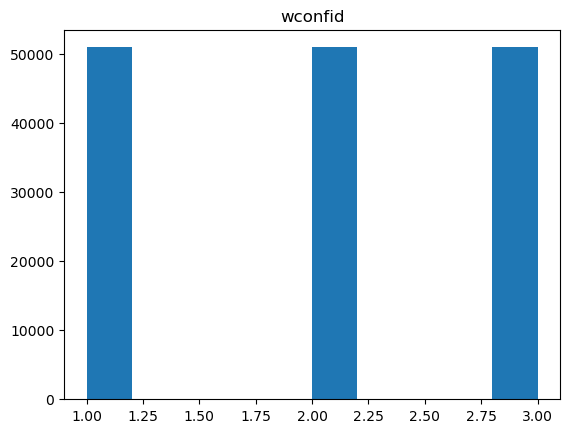

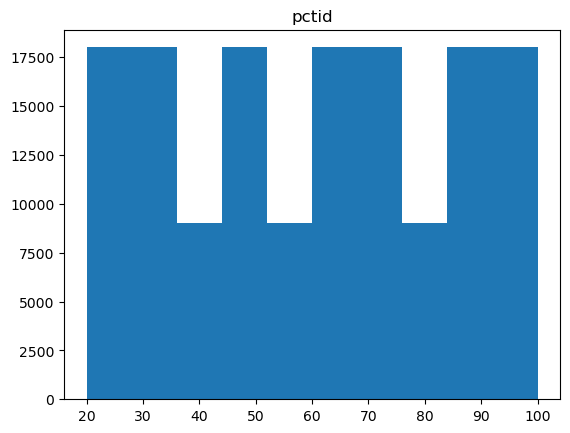

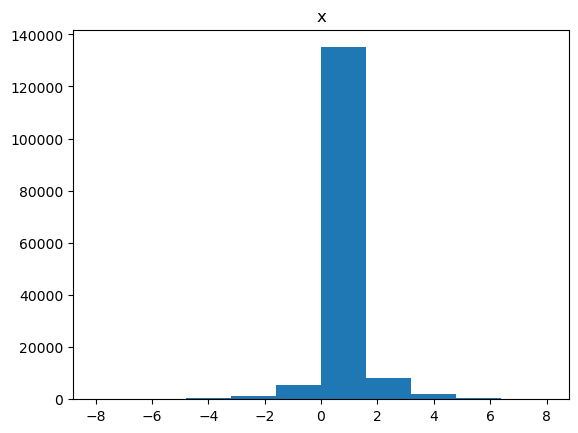

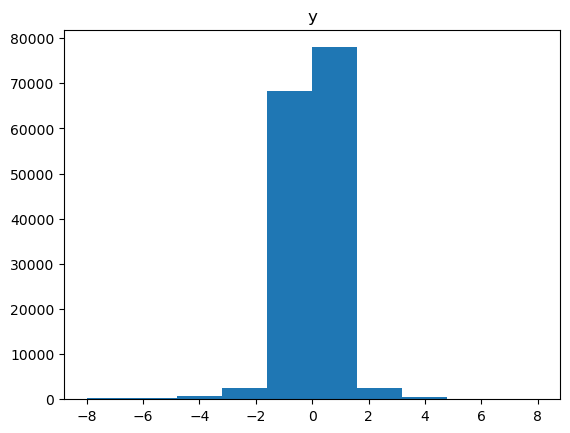

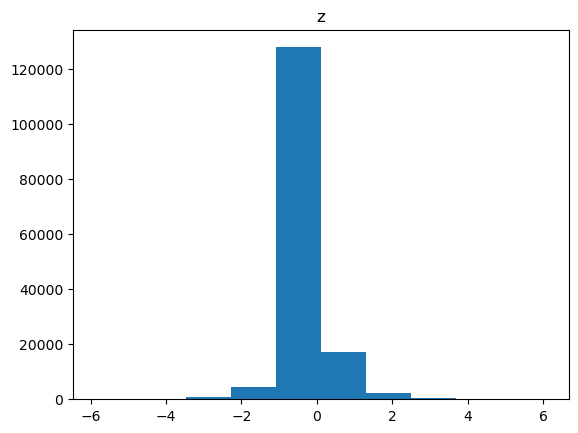

<Figure size 640x480 with 0 Axes>

In [3]:
for columna_nombre in dataframe.columns:
    graficar_columna_hist(dataframe, columna_nombre, 'plots')

## Actividad 3:
Para cada par de columnas en el dataframe calcule el coeficiente de correlación y grafique un scatter plot.

<AxesSubplot:>

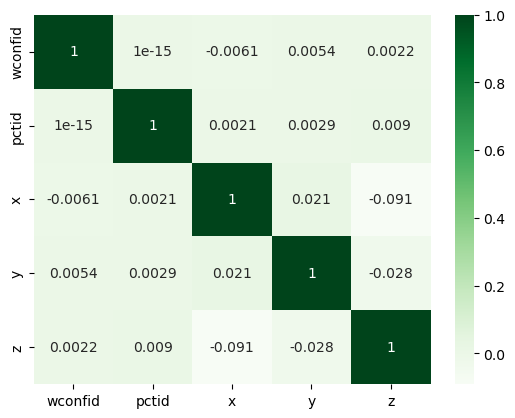

In [4]:
# usa el metodo de pandas para la correlacion de pearson
corr = dataframe.corr(method='pearson')
# grafica el array 2D usando un heatmap
sns.heatmap(corr, cmap='Greens', annot=True)

In [5]:
corr['x']['x'] # como se accede a la correlación

1.0

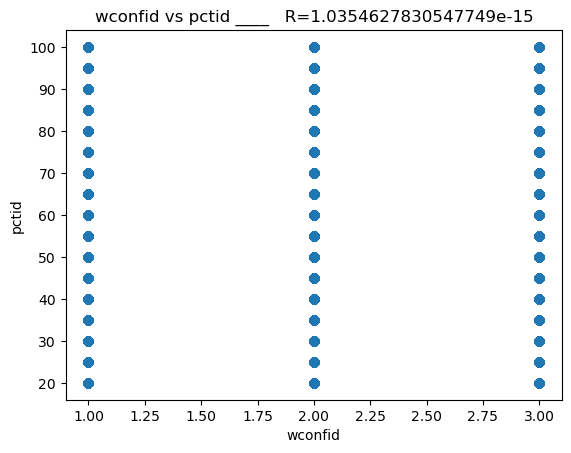

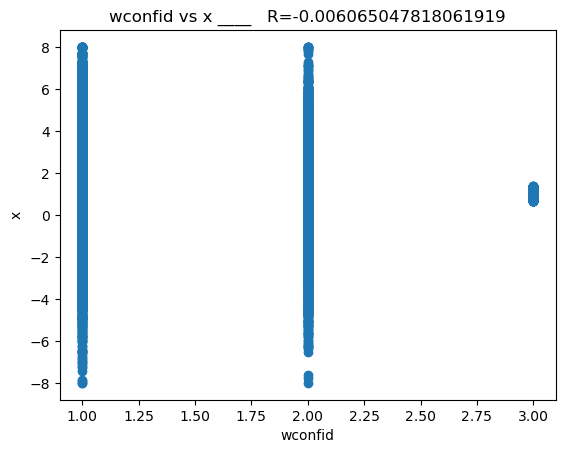

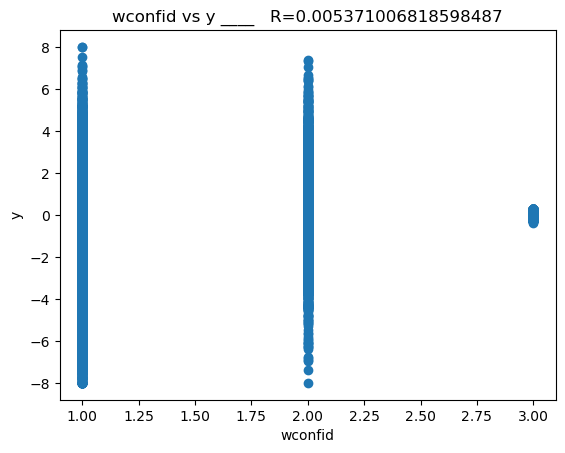

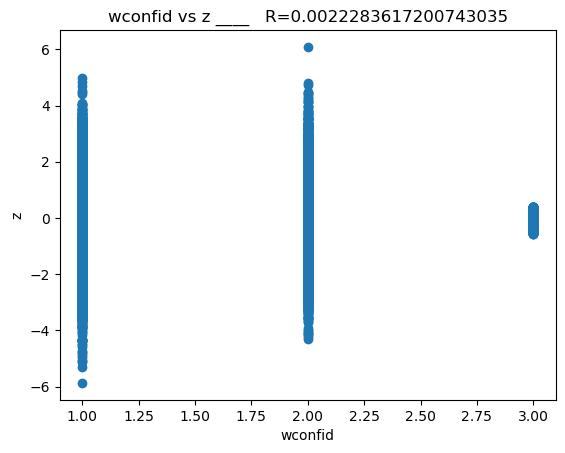

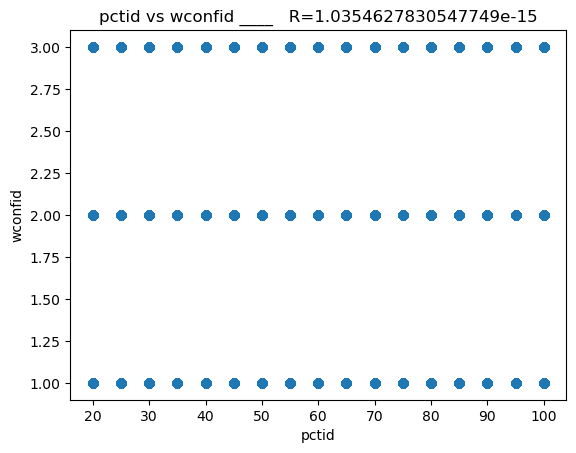

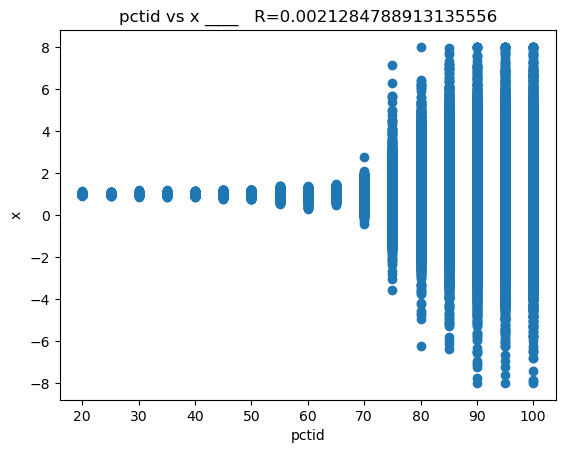

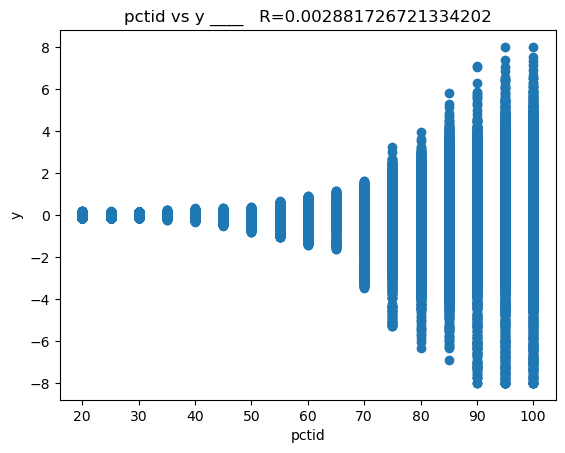

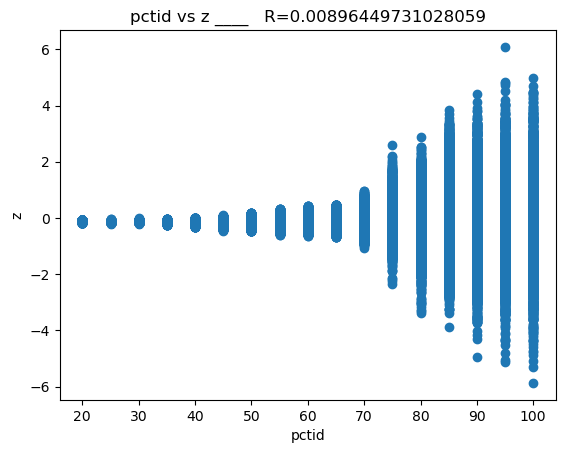

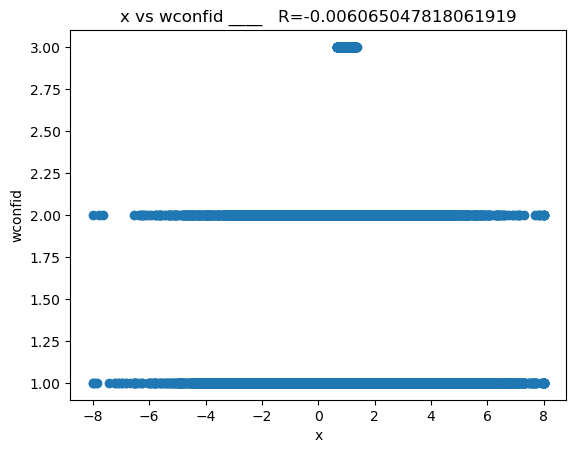

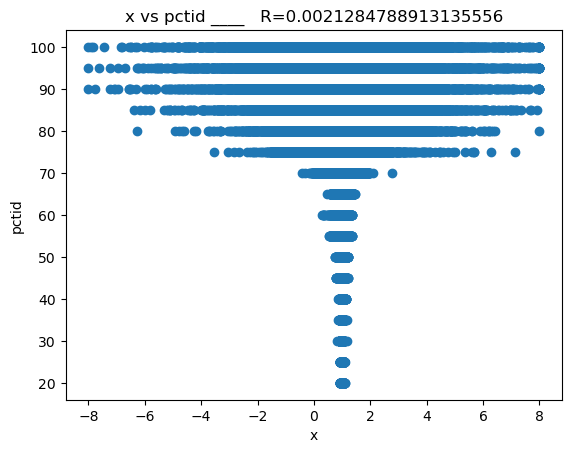

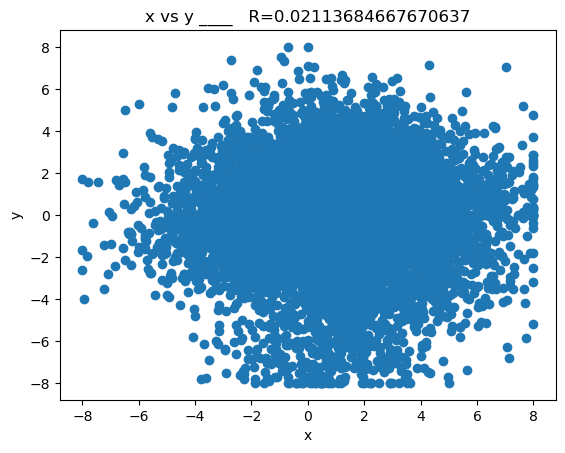

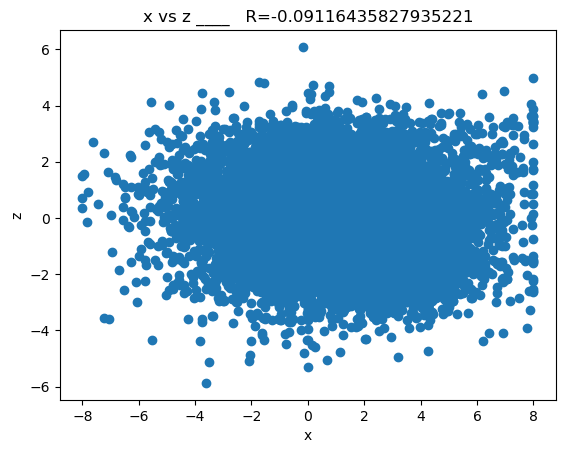

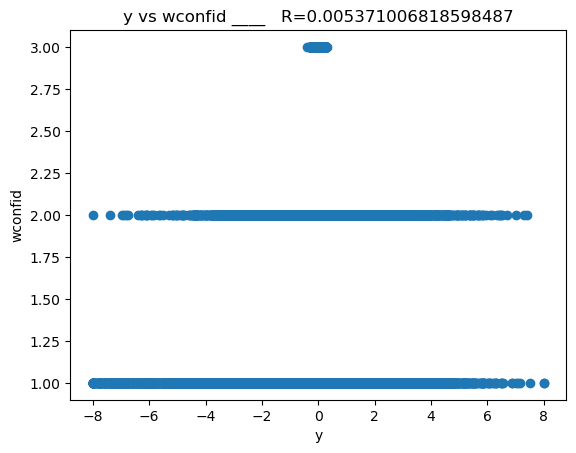

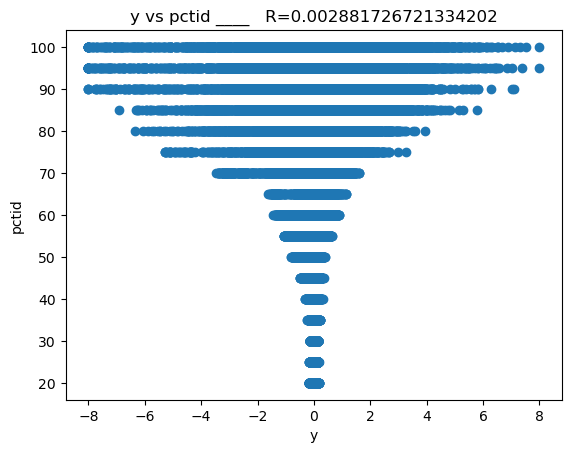

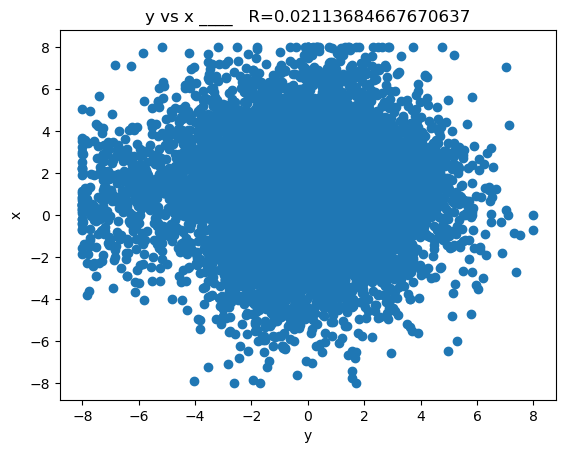

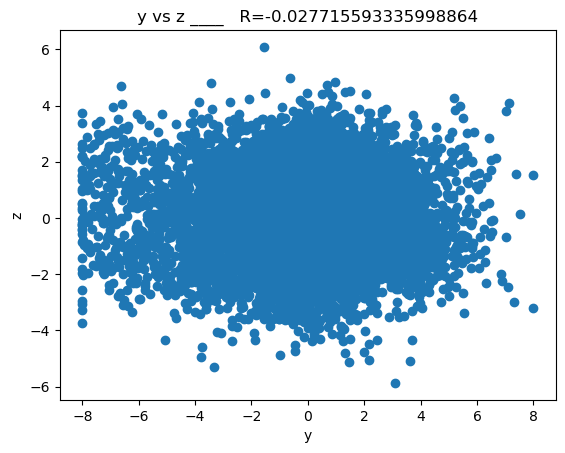

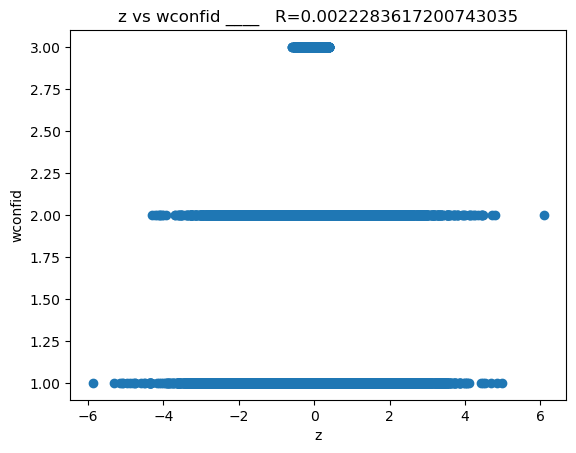

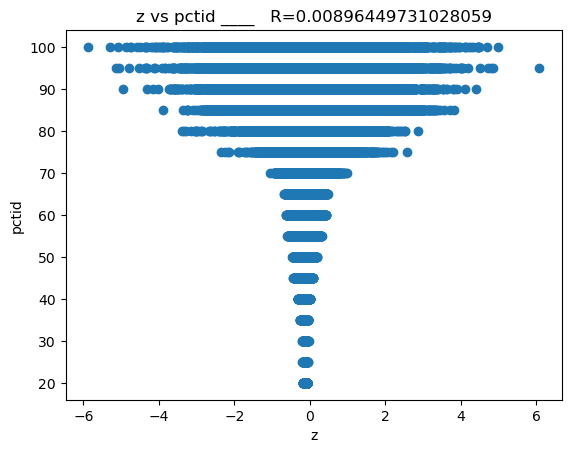

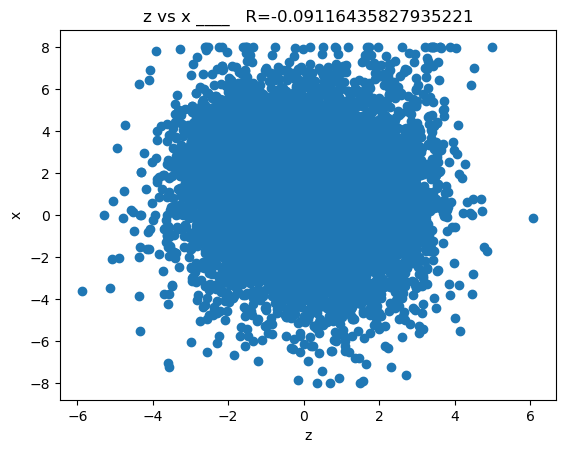

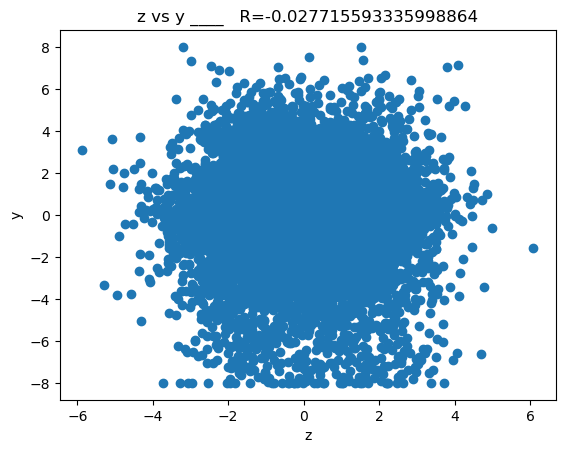

<Figure size 640x480 with 0 Axes>

In [6]:
save_path = None # carpeta para guardar, dejar en None si no se desea guardar
# save_path = 'scatter_plots'


# scatter plot de cada par
for col_i in dataframe.columns:
    for col_j in dataframe.columns:
        if col_i != col_j: # graficamos siempre que no sea la misma columna
            # se incluye nombre y el coeficiente de pearson
            plt.title(f'{col_i} vs {col_j} ____   R={corr[col_i][col_j]}')
            plt.scatter(dataframe[col_i], dataframe[col_j]) # el scatterplot simple
            plt.xlabel(col_i)
            plt.ylabel(col_j)
            plt.show()
            if save_path != None: # si se da un path, busca la carpeta y guarda la imagen
                plt.savefig(f'./{save_path}/{col_i}_{col_j}.png')
            

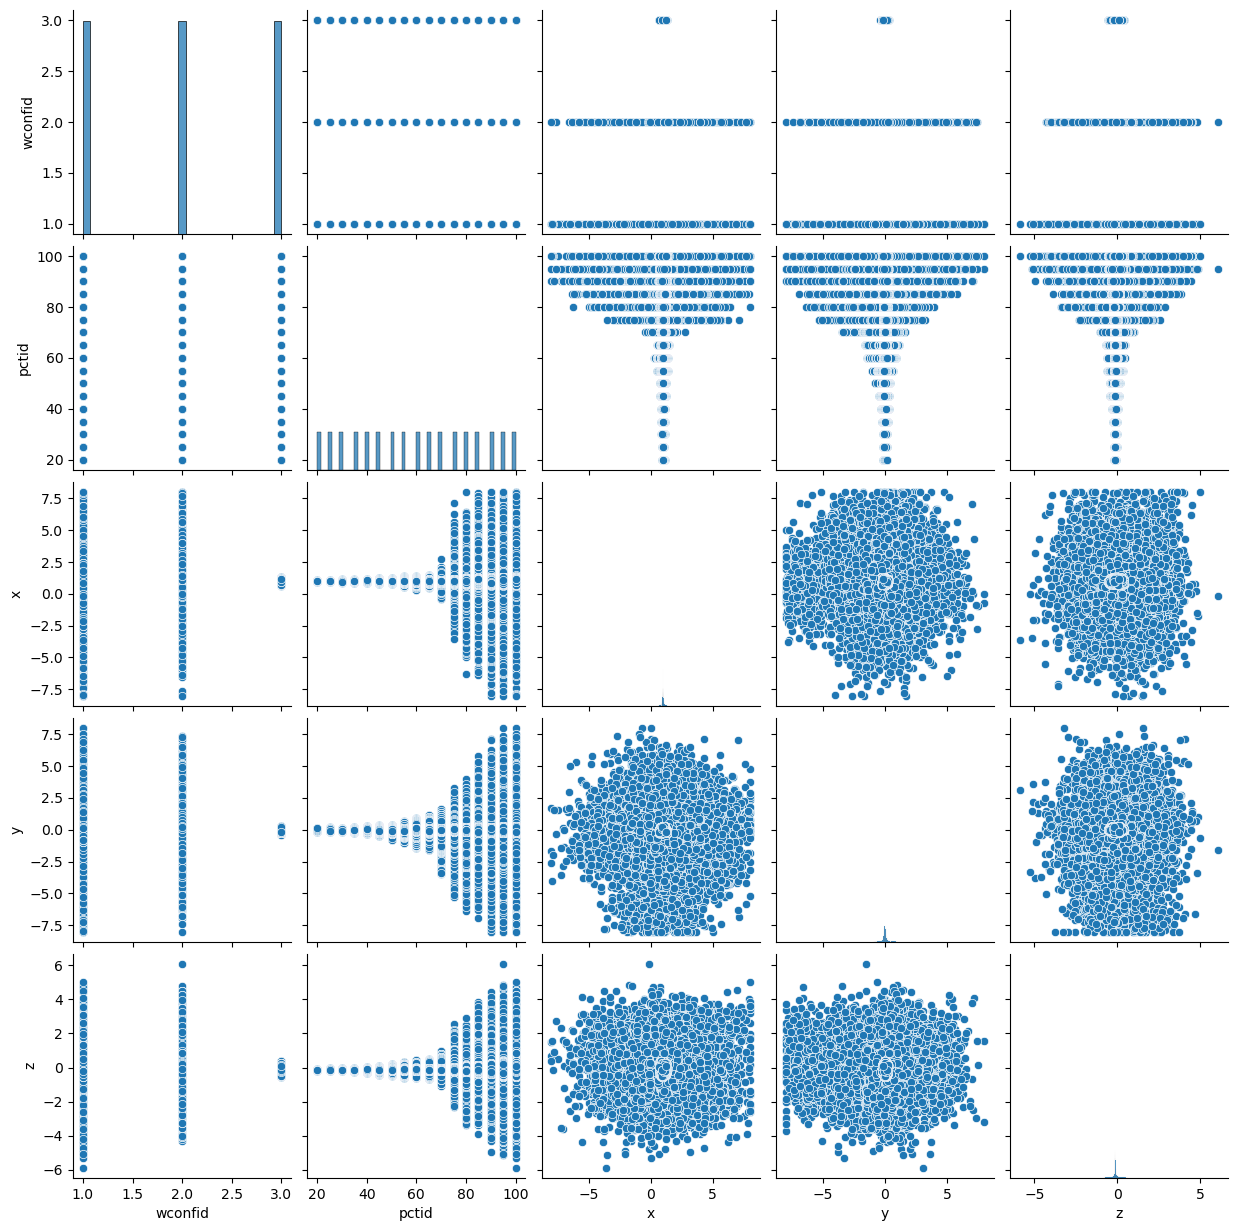

In [8]:
# alternativamente se puede usar la funcion de seaborn
sns.pairplot(dataframe)

extra analisis recomendado:

In [37]:
# si se desea analizar correctamente hemos de separar los datos del acelerometro
set_weight_configuration = set(dataframe['wconfid']) # un set me indica los valores unicos
# conversion a lista:
set_weight_configuration = [a for a in set_weight_configuration] # permite acceder a los elementos

print(f"se recomienda separa en {len(set_weight_configuration)} data sets, con dataframe['wconfid'] = {set_weight_configuration}")

se recomienda separa en 3 data sets, con dataframe['wconfid'] = [1, 2, 3]


In [38]:
dataframe_w1 = dataframe[dataframe['wconfid'] == set_weight_configuration[0]]
dataframe_w1 = dataframe[dataframe['wconfid'] == set_weight_configuration[0]]
dataframe_w1 = dataframe[dataframe['wconfid'] == set_weight_configuration[0]]

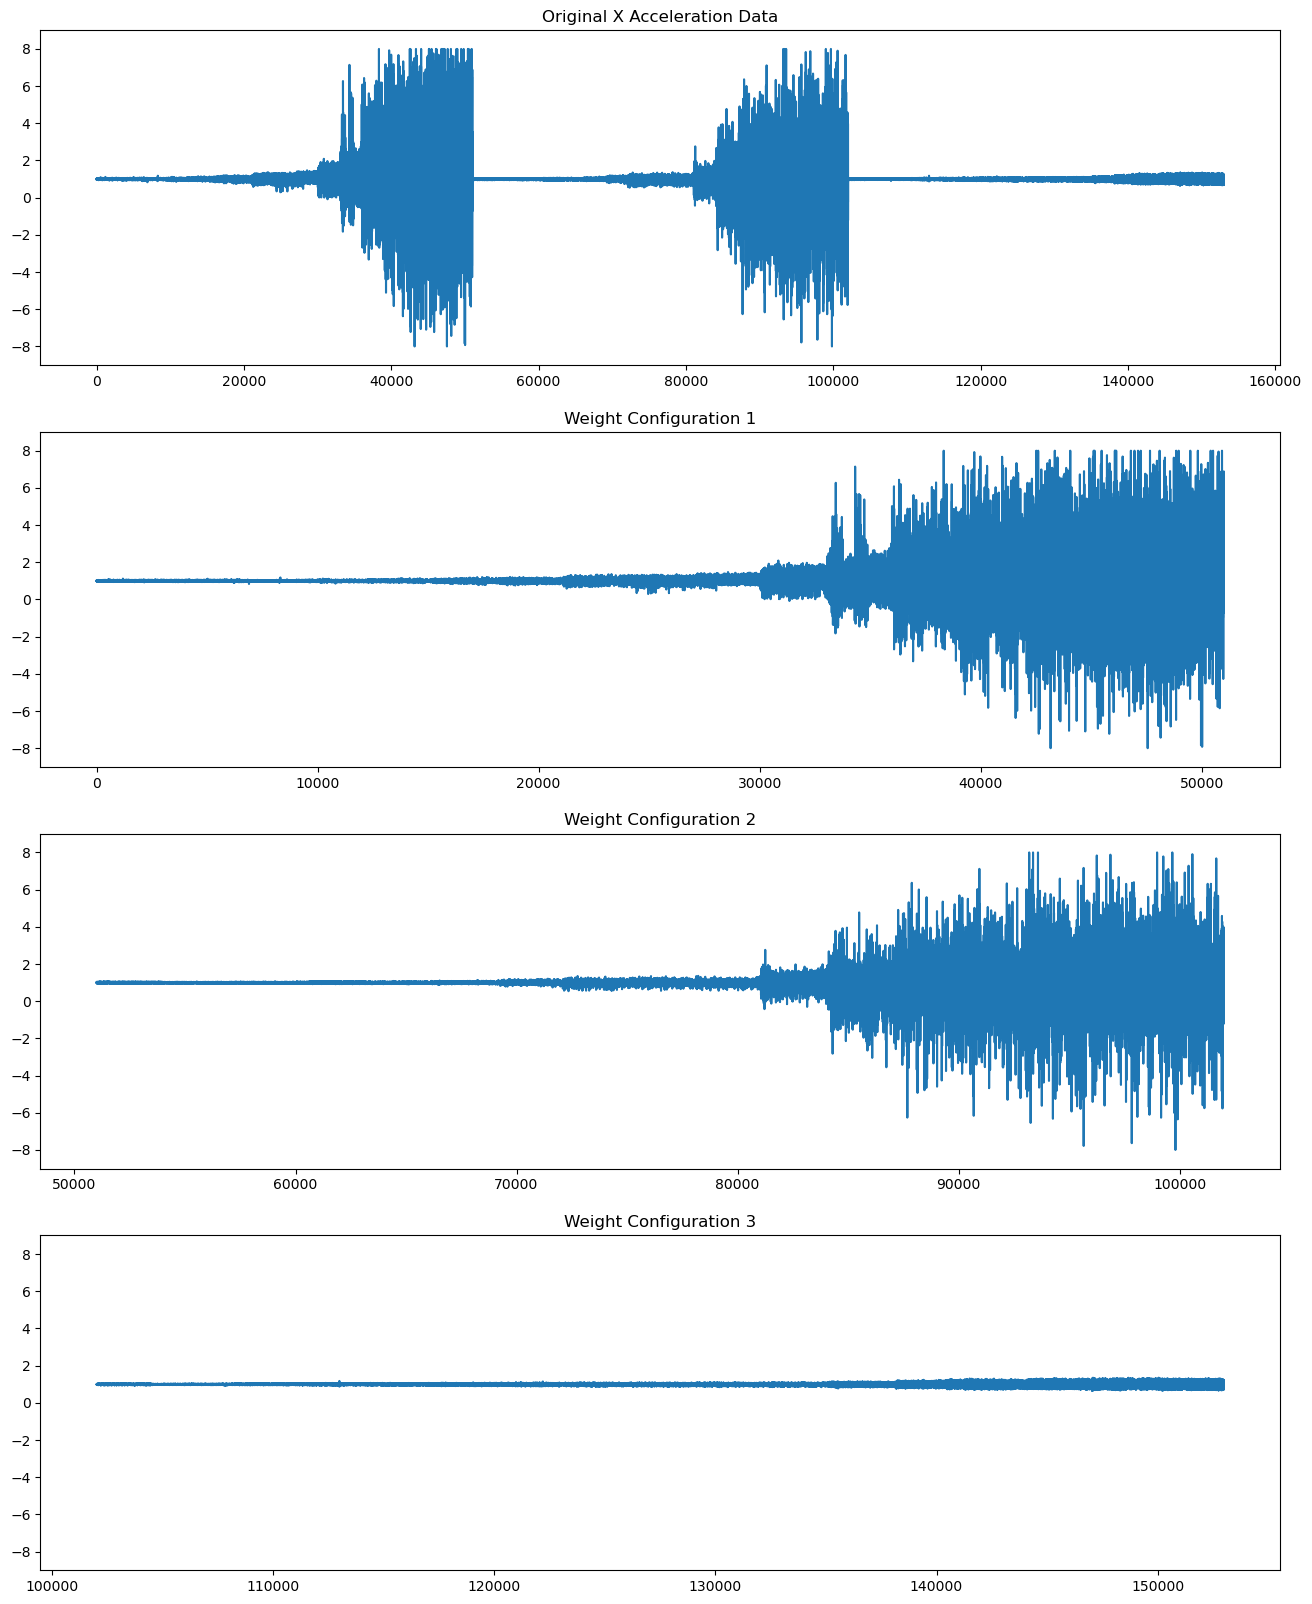

In [59]:
fig, ax = plt.subplots(1 + len(set_weight_configuration) ,1, figsize = (16,20))

ax[0].set_ylim([-9,9])
ax[0].set_title("Original X Acceleration Data")
ax[0].plot(dataframe.x)

for idx, element in enumerate(set_weight_configuration):
    ax[idx + 1].set_ylim([-9,9])
    ax[idx + 1].set_title(f"Weight Configuration {element}")
    ax[idx + 1].plot( dataframe[dataframe['wconfid'] == element].x )

## Actividad 4:
Divida el dataframe en 3 partes, donde cada parte tiene exactamente las mismas columnas, pero sólo un porcentaje definido (ej., 60%, 25% y 15%) de las filas. Hint: la librería sklearn provee funciones específicas para este fin.

In [ ]:
sk.train_test_split()